In [3]:
import logging
import numpy as np
from scipy.stats import norm

# %matplotlib inline
import astropy.units as u
from astropy.coordinates import SkyCoord
from regions import CircleSkyRegion
import matplotlib.pyplot as plt
from gammapy.analysis import Analysis, AnalysisConfig
from gammapy.datasets import MapDatasetOnOff
from gammapy.estimators import ExcessMapEstimator
from gammapy.makers import RingBackgroundMaker, SafeMaskMaker


from astroquery.simbad import Simbad
log = logging.getLogger(__name__)

In [4]:
from gammapy.utils.check import check_tutorials_setup

check_tutorials_setup()


System:

	python_executable      : /home/obriens/miniconda3/bin/python 
	python_version         : 3.9.15     
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.0        
	path                   : /home/obriens/miniconda3/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.23.5     
	scipy                  : 1.9.3      
	astropy                : 5.2        
	regions                : 0.7        
	click                  : 8.1.3      
	yaml                   : 6.0        
	IPython                : 8.7.0      
	jupyterlab             : 3.5.1      
	matplotlib             : 3.6.2      
	pandas                 : 1.5.2      
	healpy                 : not installed 
	iminuit                : 2.18.0     
	sherpa                 : not installed 
	naima                  : not installed 
	emcee                  : not installed 
	corner                 : not installed 


Gammapy environment var

In [41]:
source_pos = SkyCoord.from_name("3C 120")

map_deg = 2.5
config = AnalysisConfig()
# Select observations - 2.5 degrees from the source position
config.observations.datastore = "../V6_2020_2021w/DL3-fullenc_backgrounds/"
config.observations.obs_cone = {
    "frame": "icrs",
    "lon": source_pos.ra,
    "lat": source_pos.dec,
    "radius": map_deg * u.deg,
}

config.datasets.type = "3d"
config.datasets.geom.wcs.skydir = {
    "lon": source_pos.ra,
    "lat": source_pos.dec,
    "frame": "icrs",
}  # The WCS geometry - centered on MSH 15-52
config.datasets.geom.wcs.width = {"width": "3 deg", "height": "3 deg"}
config.datasets.geom.wcs.binsize = "0.02 deg"

# Cutout size (for the run-wise event selection)
config.datasets.geom.selection.offset_max = map_deg * u.deg

# We now fix the energy axis for the counts map - (the reconstructed energy binning)
config.datasets.geom.axes.energy.min = "1 TeV"
config.datasets.geom.axes.energy.max = "10 TeV"
config.datasets.geom.axes.energy.nbins = 10

# We need to extract the ring for each observation separately, hence, no stacking at this stage
config.datasets.stack = False


# config.datasets.safe_mask.methods = "aeff-max"

print(config)

AnalysisConfig

    general:
        log: {level: info, filename: null, filemode: null, format: null, datefmt: null}
        outdir: .
        n_jobs: 1
        datasets_file: null
        models_file: null
    observations:
        datastore: ../V6_2020_2021w/DL3-fullenc_backgrounds
        obs_ids: []
        obs_file: null
        obs_cone: {frame: icrs, lon: 68.29623197304 deg, lat: 5.35433873932 deg, radius: 2.5
                deg}
        obs_time: {start: null, stop: null}
        required_irf: [aeff, edisp, psf, bkg]
    datasets:
        type: 3d
        stack: false
        geom:
            wcs:
                skydir: {frame: icrs, lon: 68.29623197304 deg, lat: 5.35433873932 deg}
                binsize: 0.02 deg
                width: {width: 3.0 deg, height: 3.0 deg}
                binsize_irf: 0.2 deg
            selection: {offset_max: 2.5 deg}
            axes:
                energy: {min: 1.0 TeV, max: 10.0 TeV, nbins: 10}
                energy_true: {min: 0.5 TeV

In [42]:
analysis = Analysis(config)

# for this specific case,w e do not need fine bins in true energy
analysis.config.datasets.geom.axes.energy_true = (
    analysis.config.datasets.geom.axes.energy
)

# `First get the required observations
analysis.get_observations()

print(analysis.config)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}
Fetching observations.
Observations selected: 45 out of 45.
Number of selected observations: 45


AnalysisConfig

    general:
        log: {level: INFO, filename: null, filemode: null, format: null, datefmt: null}
        outdir: .
        n_jobs: 1
        datasets_file: null
        models_file: null
    observations:
        datastore: ../V6_2020_2021w/DL3-fullenc_backgrounds
        obs_ids: []
        obs_file: null
        obs_cone: {frame: icrs, lon: 68.29623197304 deg, lat: 5.35433873932 deg, radius: 2.5
                deg}
        obs_time: {start: null, stop: null}
        required_irf: [aeff, edisp, psf, bkg]
    datasets:
        type: 3d
        stack: false
        geom:
            wcs:
                skydir: {frame: icrs, lon: 68.29623197304 deg, lat: 5.35433873932 deg}
                binsize: 0.02 deg
                width: {width: 3.0 deg, height: 3.0 deg}
                binsize_irf: 0.2 deg
            selection: {offset_max: 2.5 deg}
            axes:
                energy: {min: 1.0 TeV, max: 10.0 TeV, nbins: 10}
                energy_true: {min: 1.0 TeV

In [43]:
analysis.get_datasets()

Creating reference dataset and makers.
Creating the background Maker.
No background maker set. Check configuration.
Start the data reduction loop.
Computing dataset for observation 96646
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96780
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96836
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 97728
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96725
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96698
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 97343
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 97685
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96647
Running MapDatasetMaker
Running SafeMaskMaker
Computing dataset for observation 96779
Running MapDatasetMaker
Running SafeMas

In [44]:
simbad = Simbad()
simbad.reset_votable_fields()
simbad.add_votable_fields('ra', 'dec', "flux(B)", "flux(V)", "jp11")
simbad.remove_votable_fields('coordinates')

srcs_tab = simbad.query_region(source_pos, radius=1.5*u.deg)
srcs_tab = srcs_tab[srcs_tab["FLUX_B"]<7]
srcs_tab = srcs_tab[srcs_tab["FLUX_V"]!=np.ma.masked]
srcs_tab

MAIN_ID,RA,DEC,FLUX_B,FLUX_V,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",mag,mag,
object,str13,str13,float32,float32,int32
HD 28736,04 32 04.8085,+05 24 36.148,6.783,6.352,1
HD 28978,04 34 08.2675,+05 34 07.035,5.729,5.678,1
HD 28715,04 31 50.4479,+05 45 52.024,6.66,6.67,1


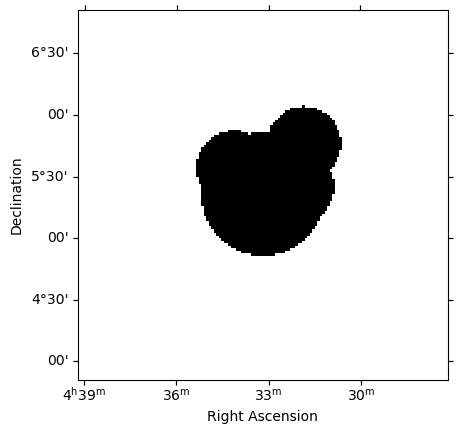

In [45]:
# get the geom that we use
geom = analysis.datasets[0].counts.geom
energy_axis = analysis.datasets[0].counts.geom.axes["energy"]
geom_image = geom.to_image().to_cube([energy_axis.squash()])

# Make the exclusion mask
regions = CircleSkyRegion(center=source_pos, radius=0.5 * u.deg)
all_ex = [regions]
stars = []
for star in srcs_tab:
    pos = SkyCoord(star["RA"], star["DEC"], frame="fk5", unit=(u.hourangle, u.deg))
    star = CircleSkyRegion(center=pos, radius=0.3 * u.deg)
    stars.append(star)
    all_ex.append(star)

exclusion_mask = ~geom_image.region_mask(all_ex)
exclusion_mask.sum_over_axes().plot()
plt.show()

In [46]:
ring_maker = RingBackgroundMaker(
    r_in="0.4 deg", width="0.3 deg", exclusion_mask=exclusion_mask
)

In [47]:
energy_axis_true = analysis.datasets[0].exposure.geom.axes["energy_true"]
stacked_on_off = MapDatasetOnOff.create(
    geom=geom_image, energy_axis_true=energy_axis_true, name="stacked"
)
# safe_mask_masker = SafeMaskMaker(methods=["offset-max"], offset_max=0.5)
for dataset in analysis.datasets:
    # Ring extracting makes sense only for 2D analysis
    dataset_on_off = ring_maker.run(dataset.to_image())
#     dataset_on_off = safe_mask_masker.run(dataset_on_off, dataset)
    stacked_on_off.stack(dataset_on_off)

In [48]:
print(stacked_on_off)

MapDatasetOnOff
---------------

  Name                            : stacked 

  Total counts                    : 9742 
  Total background counts         : 9583.29
  Total excess counts             : 158.71

  Predicted counts                : 9583.32
  Predicted background counts     : 9583.32
  Predicted excess counts         : nan

  Exposure min                    : 2.26e+09 m2 s
  Exposure max                    : 1.29e+10 m2 s

  Number of total bins            : 22500 
  Number of fit bins              : 22500 

  Fit statistic type              : wstat
  Fit statistic value (-2 log(L)) : 21869.87

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0

  Total counts_off                : 17098212 
  Acceptance                      : 22500 
  Acceptance off                  : 40922264 



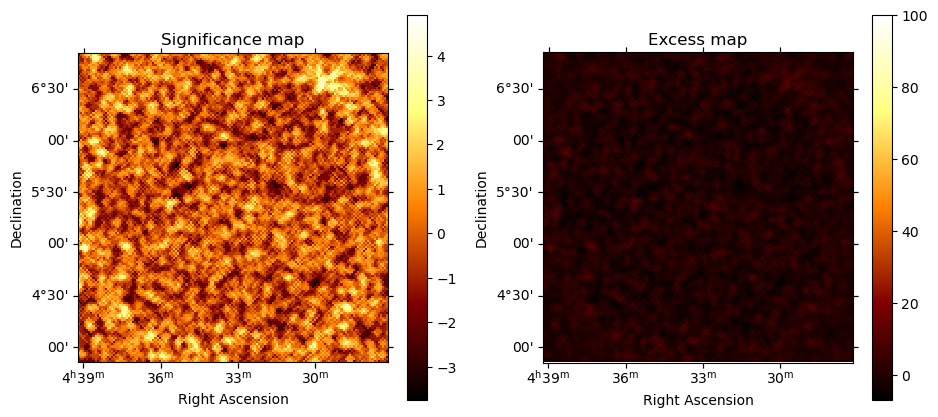

In [52]:
# Using a convolution radius of 0.04 degrees
estimator = ExcessMapEstimator(0.04 * u.deg, selection_optional=[])
lima_maps = estimator.run(stacked_on_off)

significance_map = lima_maps["sqrt_ts"]
excess_map = lima_maps["npred_excess"]

# We can plot the excess and significance maps
fig, (ax1, ax2) = plt.subplots(
    figsize=(11, 5), subplot_kw={"projection": lima_maps.geom.wcs}, ncols=2
)

ax1.set_title("Significance map")
significance_map.plot(ax=ax1, add_cbar=True)

# for star in srcs_tab:
    
ax2.set_title("Excess map")
excess_map.plot(ax=ax2, add_cbar=True, vmax = 100)
fig.savefig("3C120_Maps.png")
plt.show()

Fit results: mu = -0.01, std = 1.04


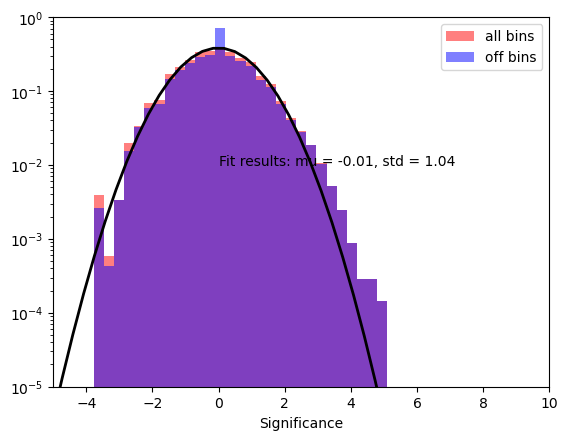

In [51]:
# create a 2D mask for the images
significance_map_off = significance_map * exclusion_mask
significance_all = significance_map.data[np.isfinite(significance_map.data)]
significance_off = significance_map_off.data[np.isfinite(significance_map_off.data)]

fig, ax = plt.subplots()
ax.hist(
    significance_all,
    density=True,
    alpha=0.5,
    color="red",
    label="all bins",
    bins=np.linspace(-5,10),
)

ax.hist(
    significance_off,
    density=True,
    alpha=0.5,
    color="blue",
    label="off bins",
    bins=np.linspace(-5,10),
)

# Now, fit the off distribution with a Gaussian
mu, std = norm.fit(significance_off)
x = np.linspace(-8, 8, 50)
p = norm.pdf(x, mu, std)
ax.plot(x, p, lw=2, color="black")
ax.legend()
ax.set_xlabel("Significance")
ax.set_yscale("log")
ax.set_ylim(1e-5, 1)
xmin, xmax = np.min(significance_all), np.max(significance_all)
ax.set_xlim(-5, 10)

print(f"Fit results: mu = {mu:.2f}, std = {std:.2f}")
ax.text(0, 0.01, f"Fit results: mu = {mu:.2f}, std = {std:.2f}")
plt.savefig("3C120_RBM.png")
plt.show()

# sphinx_gallery_thumbnail_number = 2
